Pixels are scaled in 0 to 16

In [28]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('').getOrCreate()

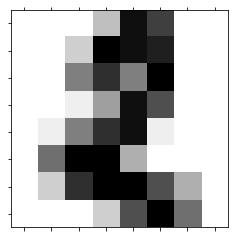

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
digits = datasets.load_digits()
def display_img(img_no):
    fig, ax = plt.subplots()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.matshow(digits.images[img_no], cmap = plt.cm.binary);
display_img(2)

This is actual grey scale representation of numbers.

In [6]:
digits.images[2]

array([[  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.],
       [  0.,   0.,   3.,  16.,  15.,  14.,   0.,   0.],
       [  0.,   0.,   8.,  13.,   8.,  16.,   0.,   0.],
       [  0.,   0.,   1.,   6.,  15.,  11.,   0.,   0.],
       [  0.,   1.,   8.,  13.,  15.,   1.,   0.,   0.],
       [  0.,   9.,  16.,  16.,   5.,   0.,   0.,   0.],
       [  0.,   3.,  13.,  16.,  16.,  11.,   5.,   0.],
       [  0.,   0.,   0.,   3.,  11.,  16.,   9.,   0.]])

In [16]:
digits.data[2]

array([  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
        16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.,   8.,  16.,
         0.,   0.,   0.,   0.,   1.,   6.,  15.,  11.,   0.,   0.,   0.,
         1.,   8.,  13.,  15.,   1.,   0.,   0.,   0.,   9.,  16.,  16.,
         5.,   0.,   0.,   0.,   0.,   3.,  13.,  16.,  16.,  11.,   5.,
         0.,   0.,   0.,   0.,   3.,  11.,  16.,   9.,   0.])

In [12]:
digits.data[2].shape

(64,)

In [7]:
digits.target[0]

0

In [18]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

Cosine Similarity - for NLP
Chi-squared Similarity - for image processing

In [22]:
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [19]:
X[0].reshape(1,-1)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [40]:
X = digits.data
co_sim = cosine_similarity(X[2].reshape(1,-1), X)

In [25]:
type(co_sim)

numpy.ndarray

In [41]:
cosf = pd.DataFrame(co_sim).T
# df = spark.createDataFrame(cosf,['similiarity'])
# df = df.orderBy(df['similiarity'].desc())
# df.show()
cosf.columns = ['similarity']
cosf.sort_values('similarity', ascending=False)

similarity
2       1.000000
57      0.969533
50      0.929800
51      0.928679
115     0.921106
277     0.917978
54      0.908602
113     0.906699
502     0.905929
556     0.904812
116     0.903299
75      0.900836
592     0.896940
612     0.894188
643     0.894135
114     0.892389
1714    0.891950
554     0.890440
1709    0.886651
1678    0.886140
818     0.885652
524     0.884957
534     0.884896
77      0.884366
645     0.881874
253     0.881414
693     0.880865
257     0.880639
1757    0.880371
242     0.879660
...          ...
1738    0.542885
1589    0.540593
1672    0.540241
1129    0.539723
633     0.538840
1285    0.537464
1101    0.535810
541     0.535744
1024    0.535010
291     0.532383
358     0.531340
636     0.530463
920     0.529008
1277    0.527895
618     0.526031
1306    0.525025
467     0.524245
1162    0.523749
1259    0.521762
587     0.518020
562     0.517638
1407    0.514008
1420    0.512968
625     0.510295
940     0.504340
1440    0.503433
1316    0.502110
447     0.484919
1302    0.478968
1769    0.468415

[1797 rows x 1 columns]

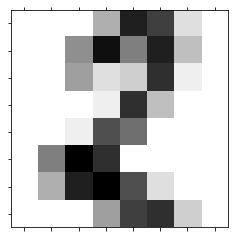

In [43]:
display_img(50)

In [45]:
from sklearn.metrics.pairwise import chi2_kernel
k_sim = chi2_kernel(X[2].reshape(1,-1), X)
kf = pd.DataFrame(k_sim).T
kf.columns = ['similarity']
kf.sort_values('similarity', ascending=False)

similarity
2      1.000000e+00
57     1.415538e-15
556    1.080386e-23
113    9.889363e-26
612    4.100127e-26
277    2.509733e-26
643    1.422607e-26
50     2.264311e-27
592    3.626670e-28
534    5.471300e-29
51     3.265812e-29
115    2.467137e-29
116    1.447080e-30
502    6.948653e-32
114    3.374027e-32
645    2.325810e-32
554    1.651402e-32
75     3.363707e-33
639    1.609985e-33
1714   7.040480e-34
257    7.780076e-35
54     4.608739e-35
253    2.717458e-35
346    4.882501e-36
336    4.712323e-36
242    2.671062e-36
544    2.561035e-36
524    1.537092e-36
341    1.159507e-36
716    9.473307e-37
...             ...
1022  7.291475e-118
548   4.894233e-118
641   1.690143e-118
292   1.619544e-118
562   1.488172e-118
1024  9.745386e-119
1162  9.642422e-119
1296  6.412012e-119
1182  5.555574e-119
1101  4.172094e-119
1589  1.614828e-119
1306  8.957351e-120
1006  7.161729e-120
467   1.440721e-120
940   1.189252e-120
1672  9.638002e-121
1259  6.780296e-121
1262  4.951358e-121
1440  2.774638e-121
1277  7.788711e-122
766   6.516976e-122
1172  2.802835e-122
636   3.513770e-123
1407  2.175208e-123
447   1.594713e-124
1572  1.454735e-125
163   7.024804e-126
1769  5.690637e-127
1316  1.182729e-129
1302  1.927135e-133

[1797 rows x 1 columns]